**Import Key Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load .csv files**

In [2]:
train_df   = pd.read_csv('train_v9rqX0R.csv')
test_df    = pd.read_csv('test_AbJTz2l.csv')
submission = pd.read_csv('sample_submission_8RXa3c6.csv')

**Exploratory Data Analysis and Pre-processing**

**Dataset Information**

In [3]:
print("############################################")
print("          Info Of the Train Data Set")
print("############################################")
train_df.info()

############################################
          Info Of the Train Data Set
############################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 n

In [4]:
print("############################################")
print("          Info Of the Test Data Set")
print("############################################")
test_df.info()

############################################
          Info Of the Test Data Set
############################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)

In [5]:
print("############################################")
print("          Info Of the Submission Data Set")
print("############################################")
submission.info()

############################################
          Info Of the Submission Data Set
############################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Item_Identifier    5681 non-null   object
 1   Outlet_Identifier  5681 non-null   object
 2   Item_Outlet_Sales  5681 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 133.3+ KB


In [6]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [8]:
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [9]:
train_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

**Dealing with Missing Values**

In [10]:
#filling the null values
train_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
train_df['Item_Weight'] = train_df['Item_Weight'].fillna(train_df['Item_Weight'].mean())

In [12]:
train_df['Outlet_Size'] = train_df['Outlet_Size'].fillna('Medium')

In [13]:
train_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**Plot Numerical Variables**

<AxesSubplot: title={'center': 'Item_Type'}>

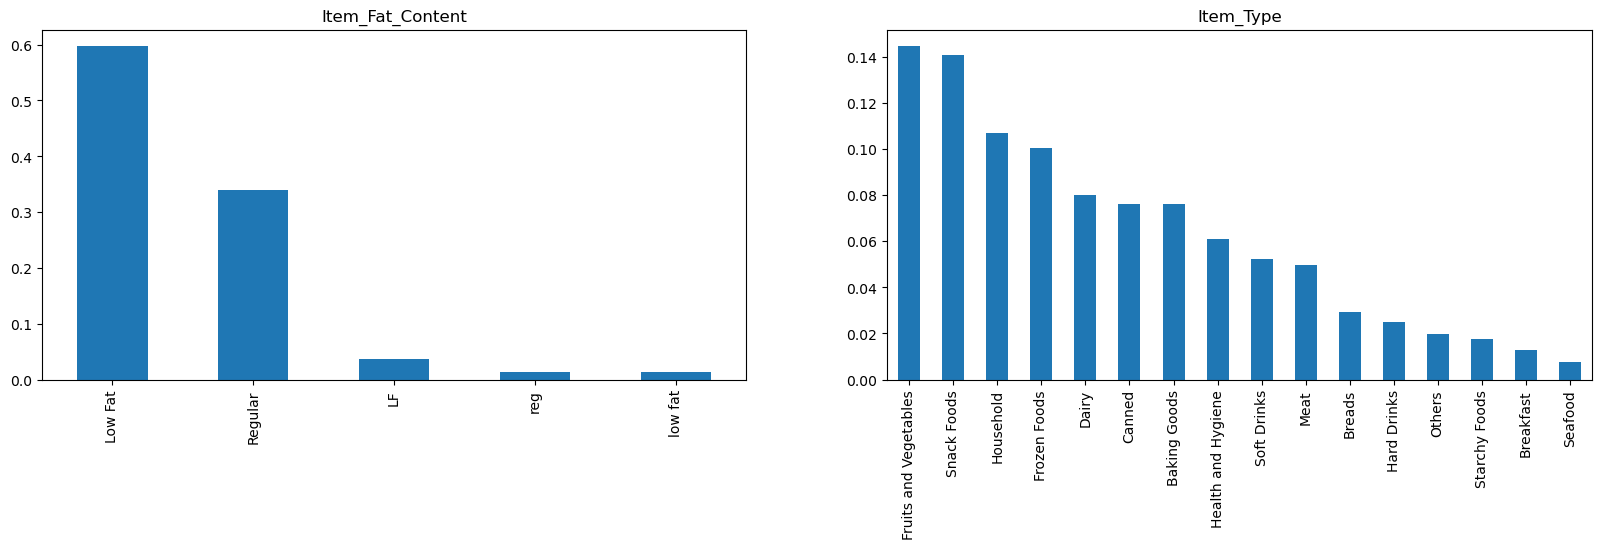

In [14]:
plt.figure(1)
plt.subplot(221)
train_df['Item_Fat_Content'].value_counts(normalize = True).plot.bar( title ='Item_Fat_Content' )
plt.subplot(222)
train_df['Item_Type'].value_counts(normalize = True).plot.bar(figsize = (20,10), title ='Item_Type' )

<AxesSubplot: title={'center': 'Outlet_Size'}>

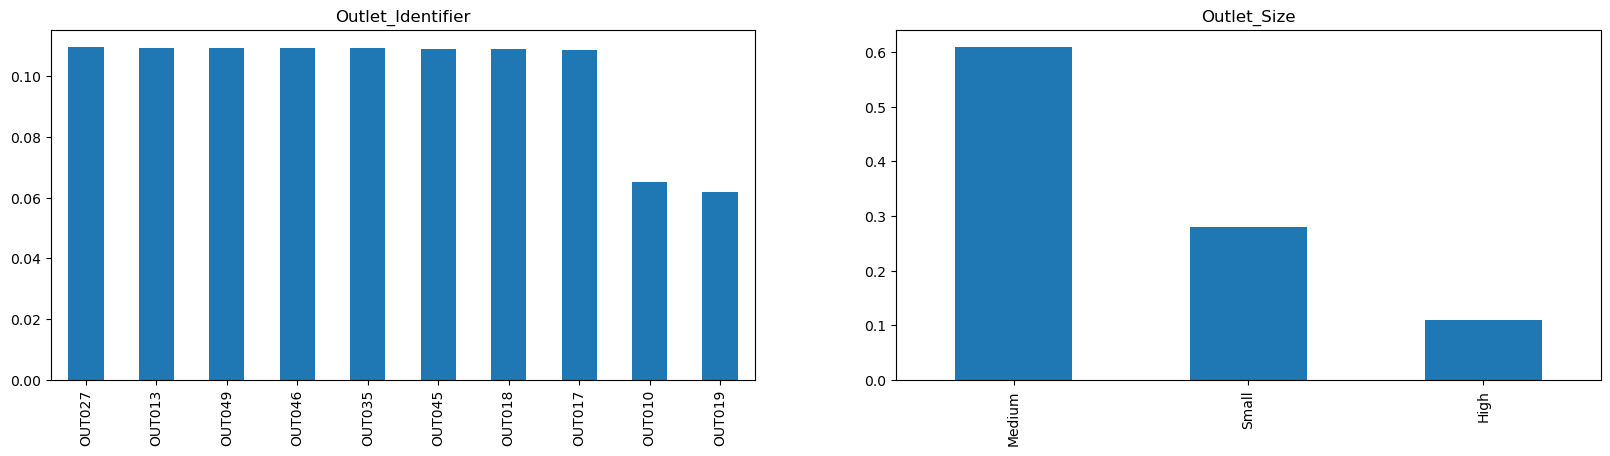

In [15]:
plt.figure(1)
plt.subplot(221)
train_df['Outlet_Identifier'].value_counts(normalize = True).plot.bar( title ='Outlet_Identifier' )
plt.subplot(222)
train_df['Outlet_Size'].value_counts(normalize = True).plot.bar(figsize = (20,10), title ='Outlet_Size' )

<AxesSubplot: title={'center': 'Outlet_Type'}>

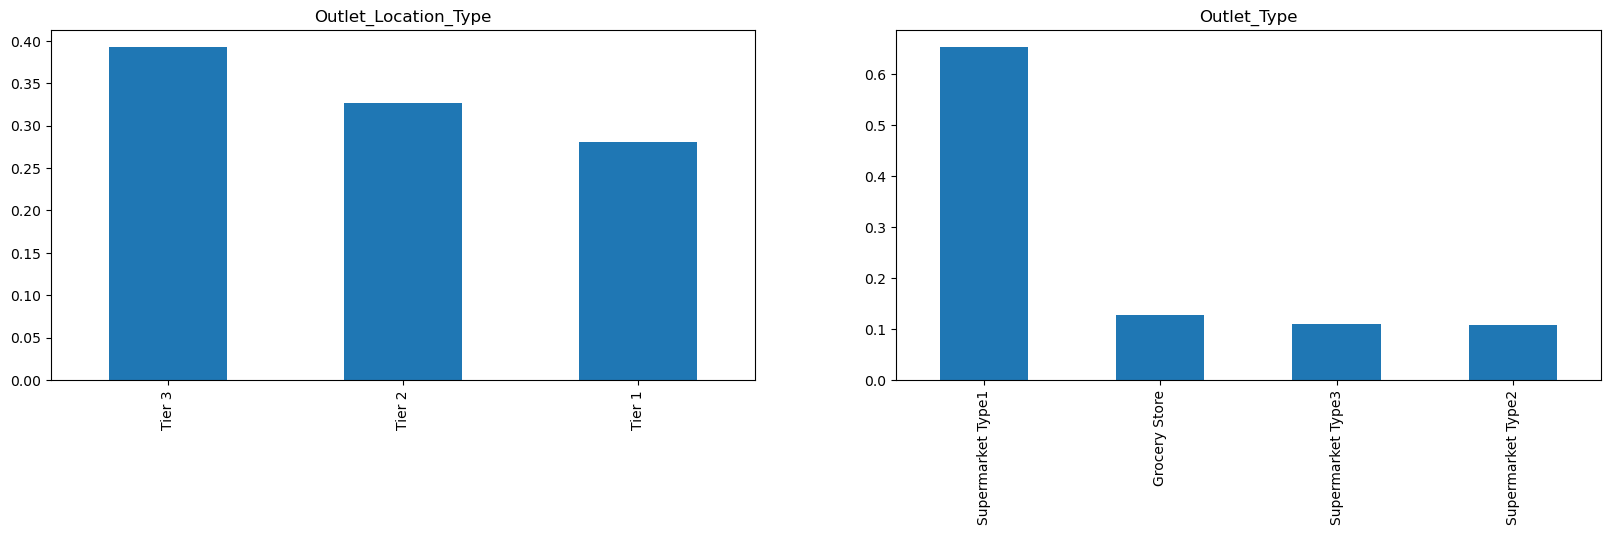

In [16]:
plt.figure(1)
plt.subplot(221)
train_df['Outlet_Location_Type'].value_counts(normalize = True).plot.bar(figsize = (20,10), title ='Outlet_Location_Type' )
plt.subplot(222)
train_df['Outlet_Type'].value_counts(normalize = True).plot.bar( title ='Outlet_Type' )

In [17]:
train_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [18]:
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].replace('reg', 'Regular')

In [19]:
train_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [20]:
train_df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [21]:
train_df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

C:\Users\USER\AppData\Local\Temp\ipykernel_12852\1800024771.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['Item_Weight'])


<AxesSubplot: xlabel='Item_Weight', ylabel='Density'>

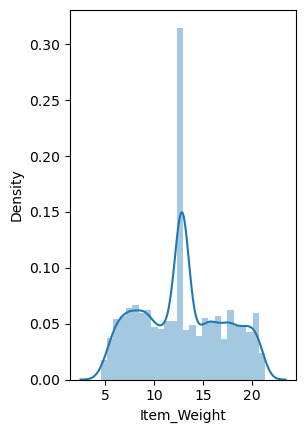

In [22]:
#univariate analysis of bivariate analysis

plt.figure(1)
plt.subplot(121)
sns.distplot(train_df['Item_Weight'])

C:\Users\USER\AppData\Local\Temp\ipykernel_12852\3964592803.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['Item_Visibility'])


<AxesSubplot: xlabel='Item_Visibility', ylabel='Density'>

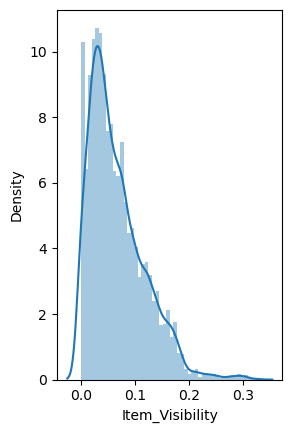

In [23]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df['Item_Visibility'])

C:\Users\USER\AppData\Local\Temp\ipykernel_12852\774010758.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['Item_MRP'])


<AxesSubplot: xlabel='Item_MRP', ylabel='Density'>

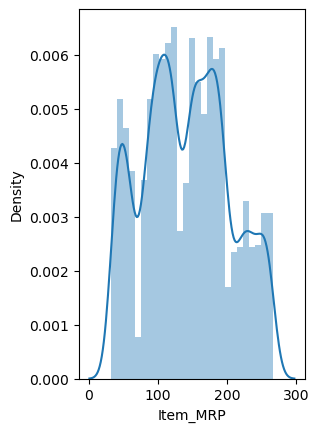

In [24]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df['Item_MRP'])

C:\Users\USER\AppData\Local\Temp\ipykernel_12852\1823248680.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['Outlet_Establishment_Year'])


<AxesSubplot: xlabel='Outlet_Establishment_Year', ylabel='Density'>

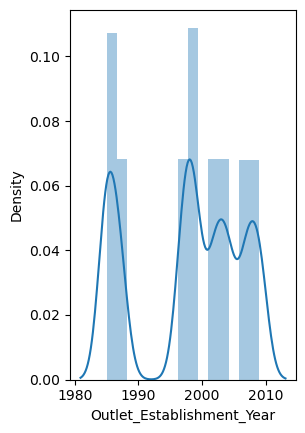

In [25]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df['Outlet_Establishment_Year'])

C:\Users\USER\AppData\Local\Temp\ipykernel_12852\3362802069.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['Item_Outlet_Sales'])


<AxesSubplot: xlabel='Item_Outlet_Sales', ylabel='Density'>

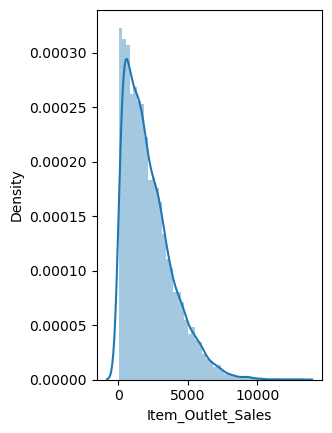

In [26]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df['Item_Outlet_Sales'])

In [27]:
#Coverting Categorical Variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [28]:
train_df['Item_Fat_Content_le'] = le.fit_transform(train_df.Item_Fat_Content)

In [29]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_le
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,1
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0


In [30]:
train_df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [31]:
df1 = pd.get_dummies(train_df['Outlet_Size'], drop_first=True)
df2 = pd.get_dummies(train_df['Outlet_Location_Type'], drop_first=True)
df3 = pd.get_dummies(train_df['Outlet_Type'], drop_first=True)

In [32]:
train_df = pd.concat([train_df, df1], axis = 1)
train_df = pd.concat([train_df, df2], axis = 1)
train_df = pd.concat([train_df, df3], axis = 1)

In [33]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_le,Medium,Small,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0,1,0,0,0,1,0,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1,1,0,0,1,0,1,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0,1,0,0,0,1,0,0
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,1,1,0,0,1,0,0,0
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0,0,0,0,1,1,0,0


In [34]:
train_df = train_df.drop(['Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Fat_Content'], axis = 1 )

In [35]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_le,Medium,Small,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,0,1,0,0,0,1,0,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,1,1,0,0,1,0,1,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,0,1,0,0,0,1,0,0
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,1,1,0,0,1,0,0,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,0,0,0,0,1,1,0,0


In [36]:
train_df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [37]:
train_df['Item_Type_le'] = le.fit_transform(train_df.Item_Type)
train_df['Outlet_Identifier_le'] = le.fit_transform(train_df.Outlet_Identifier)
train_df['Outlet_Establishment_Year_le'] = le.fit_transform(train_df.Outlet_Establishment_Year)

In [38]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_le,Medium,Small,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3,Item_Type_le,Outlet_Identifier_le,Outlet_Establishment_Year_le
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,0,1,0,0,0,1,0,0,4,9,4
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,1,1,0,0,1,0,1,0,14,3,8
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,0,1,0,0,0,1,0,0,10,9,4
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,1,1,0,0,1,0,0,0,6,0,3
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,0,0,0,0,1,1,0,0,9,1,1


In [39]:
train_df = train_df.drop(['Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year'], axis = 1 )

In [40]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_le,Medium,Small,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3,Item_Type_le,Outlet_Identifier_le,Outlet_Establishment_Year_le
0,FDA15,9.30,0.016047,249.8092,3735.1380,0,1,0,0,0,1,0,0,4,9,4
1,DRC01,5.92,0.019278,48.2692,443.4228,1,1,0,0,1,0,1,0,14,3,8
2,FDN15,17.50,0.016760,141.6180,2097.2700,0,1,0,0,0,1,0,0,10,9,4
3,FDX07,19.20,0.000000,182.0950,732.3800,1,1,0,0,1,0,0,0,6,0,3
4,NCD19,8.93,0.000000,53.8614,994.7052,0,0,0,0,1,1,0,0,9,1,1


In [41]:
X = train_df.drop(['Item_Identifier', 'Item_Outlet_Sales'], axis = 1)
y = train_df[['Item_Outlet_Sales']]

In [42]:
y

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052
...,...
8518,2778.3834
8519,549.2850
8520,1193.1136
8521,1845.5976


In [43]:
#pip install xgboost

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [45]:
import xgboost as xgb

In [46]:
xgb_model = xgb.XGBRegressor()

In [47]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [48]:
y_pred = xgb_model.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred))

In [50]:
rms

1116.9897076951536

**Working on test file**

In [51]:
test_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [52]:
test_df.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [53]:
test_df['Item_Weight'] = test_df['Item_Weight'].fillna(test_df['Item_Weight'].mean())
test_df['Outlet_Size'] = test_df['Outlet_Size'].fillna('Medium')

In [54]:
test_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [55]:
test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')
test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].replace('reg', 'Regular')

In [56]:
test_df['Item_Fat_Content_le'] = le.fit_transform(test_df.Item_Fat_Content)

df1 = pd.get_dummies(test_df['Outlet_Size'], drop_first=True)
df2 = pd.get_dummies(test_df['Outlet_Location_Type'], drop_first=True)
df3 = pd.get_dummies(test_df['Outlet_Type'], drop_first=True)

test_df = pd.concat([test_df, df1], axis = 1)
test_df = pd.concat([test_df, df2], axis = 1)
test_df = pd.concat([test_df, df3], axis = 1)

test_df = test_df.drop(['Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Fat_Content'], axis = 1 )

In [57]:
test_df['Item_Type_le'] = le.fit_transform(test_df.Item_Type)
test_df['Outlet_Identifier_le'] = le.fit_transform(test_df.Outlet_Identifier)
test_df['Outlet_Establishment_Year_le'] = le.fit_transform(test_df.Outlet_Establishment_Year)



In [58]:
Outlet_identifier = test_df[['Outlet_Identifier']]
test_df = test_df.drop(['Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year'], axis = 1 )

In [59]:
Outlet_identifier

,Outlet_Identifier
0,OUT049
1,OUT017
2,OUT010
3,OUT017
4,OUT027
...,...
5676,OUT046
5677,OUT018
5678,OUT045
5679,OUT017


In [60]:
Item_identifier = test_df[['Item_Identifier']]
test_df = test_df.drop(['Item_Identifier'], axis = 1)

In [61]:
Item_identifier

,Item_Identifier
0,FDW58
1,FDW14
2,NCN55
3,FDQ58
4,FDY38
...,...
5676,FDB58
5677,FDD47
5678,NCO17
5679,FDJ26


In [62]:
submission = pd.concat([Item_identifier, Outlet_identifier], axis = 1)
submission

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027
...,...,...
5676,FDB58,OUT046
5677,FDD47,OUT018
5678,NCO17,OUT045
5679,FDJ26,OUT017


In [63]:
prediction = xgb_model.predict(test_df)

In [64]:
prediction

array([ 847.1532, 1393.279 ,  861.728 , ..., 1766.4277, 4139.1177,
       1706.9032], dtype=float32)

In [65]:
#abs to avoid -ve values in prediction
submission['Item_Outlet_Sales'] = abs(prediction)
#converting submission dataframe to csv
submission.to_csv('xbg.csv', index = False)

In [66]:
submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,847.153198
1,FDW14,OUT017,1393.279053
2,NCN55,OUT010,861.728027
3,FDQ58,OUT017,2067.321533
4,FDY38,OUT027,6682.637207
...,...,...,...
5676,FDB58,OUT046,1980.233032
5677,FDD47,OUT018,2479.981934
5678,NCO17,OUT045,1766.427734
5679,FDJ26,OUT017,4139.117676


In [67]:
rms = sqrt(mean_squared_error(y_test, y_pred))

In [68]:
rms

1116.9897076951536

**Linear Regressor**

In [69]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [70]:
lr.fit(X_train, y_train)

LinearRegression()

In [71]:
y_pred_lr = lr.predict(X_test)

In [72]:
rms_lr = sqrt(mean_squared_error(y_test, y_pred_lr))

In [73]:
rms_lr

1067.357957007926

In [74]:
prediction_lr = lr.predict(test_df)

In [75]:
prediction_lr

array([[1837.69386646],
       [1559.18729035],
       [1882.57870974],
       ...,
       [1850.08366838],
       [3555.71296914],
       [1279.70268397]])

In [76]:
#abs to avoid -ve values in prediction
submission['Item_Outlet_Sales'] = abs(prediction_lr)
#converting submission dataframe to csv
submission.to_csv('lr.csv', index = False)

In [77]:
submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1837.693866
1,FDW14,OUT017,1559.187290
2,NCN55,OUT010,1882.578710
3,FDQ58,OUT017,2578.380030
4,FDY38,OUT027,5175.438048
...,...,...,...
5676,FDB58,OUT046,2306.380485
5677,FDD47,OUT018,2430.660806
5678,NCO17,OUT045,1850.083668
5679,FDJ26,OUT017,3555.712969


In [78]:
rms_lr = sqrt(mean_squared_error(y_test, y_pred_lr))

In [79]:
rms_lr

1067.357957007926

**Decision Tree**

In [80]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [81]:
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [82]:
y_pred_dt = dt.predict(X_test)

In [83]:
y_pred_dt

array([ 792.302 ,  669.129 ,  918.804 , ...,  759.012 ,  199.74  ,
       1326.2736])

In [84]:
rms_dt = sqrt(mean_squared_error(y_test, y_pred_dt))

In [85]:
rms_dt

1498.0213766179104

In [86]:
prediction_dt = dt.predict(test_df)

In [87]:
prediction_dt

array([1822.2946, 1318.284 ,  246.346 , ...,  361.5294, 5759.17  ,
       1728.4168])

In [88]:
#abs to avoid -ve values in prediction
submission['Item_Outlet_Sales'] = abs(prediction_dt)
#converting submission dataframe to csv
submission.to_csv('dt.csv', index = False)

In [89]:
submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1822.2946
1,FDW14,OUT017,1318.2840
2,NCN55,OUT010,246.3460
3,FDQ58,OUT017,612.5360
4,FDY38,OUT027,6024.1584
...,...,...,...
5676,FDB58,OUT046,3119.9388
5677,FDD47,OUT018,1336.9264
5678,NCO17,OUT045,361.5294
5679,FDJ26,OUT017,5759.1700


In [90]:
rms_dt = sqrt(mean_squared_error(y_test, y_pred_dt))

In [91]:
rms_dt

1498.0213766179104